In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.applications import VGG16
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers import Activation , BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam , Adamax
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import classification_report

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

In [ ]:
!unzip new-plant-diseases-dataset.zip

In [ ]:
traindir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
validdir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
testdir = "/content/test/test"

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128

training_set = train_datagen.flow_from_directory(traindir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(validdir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

In [ ]:
class_names = os.listdir(traindir)
class_names

In [ ]:
class_dict = training_set.class_indices
class_dict

In [ ]:
li = list(class_dict.keys())
li

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples
print("Training samples number : ", train_num)
print("Validation samples number : ", valid_num)

Training samples number :  70295
Validation samples number :  17572


In [ ]:
base_model=VGG16(include_top=False,input_shape=(224,224,3))
base_model.trainable=False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(38,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 38)                953382    
                                                                 
Total params: 15668070 (59.77 MB)
Trainable params: 953382 (3.64 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
learning_rate = 0.001

opti = Adam(learning_rate=learning_rate)

classifier.compile(loss='categorical_crossentropy',
                   metrics=['accuracy'],
                   optimizer=opti)

In [ ]:
history = classifier.fit(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=5,
                         validation_steps=valid_num//batch_size
                        )

Epoch 1/5
549/549 [==============================] - 1104s 2s/step - loss: 0.7098 - accuracy: 0.7890 - val_loss: 0.3544 - val_accuracy: 0.8867
Epoch 2/5
549/549 [==============================] - 1088s 2s/step - loss: 0.3696 - accuracy: 0.8814 - val_loss: 0.2969 - val_accuracy: 0.9052
Epoch 3/5
549/549 [==============================] - 1091s 2s/step - loss: 0.3254 - accuracy: 0.8948 - val_loss: 0.3192 - val_accuracy: 0.9015
Epoch 4/5
549/549 [==============================] - 1128s 2s/step - loss: 0.2969 - accuracy: 0.9041 - val_loss: 0.2573 - val_accuracy: 0.9224
Epoch 5/5
549/549 [==============================] - 1089s 2s/step - loss: 0.2769 - accuracy: 0.9116 - val_loss: 0.3263 - val_accuracy: 0.9011


In [ ]:
#5 epoch running for 1 hour 35 minutes 26 seconds
# Saving the model
filepath = "Mymodel.h5"
classifier.save(filepath)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


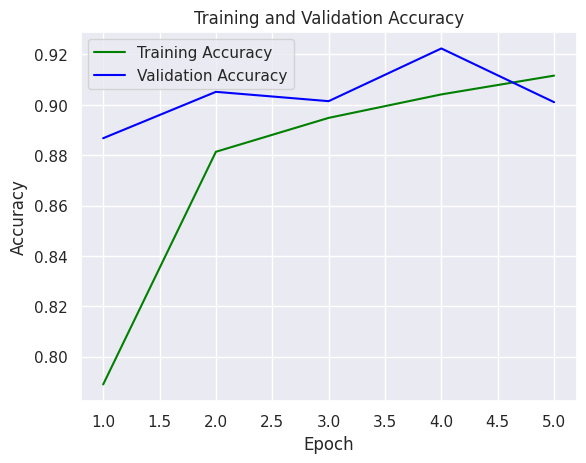

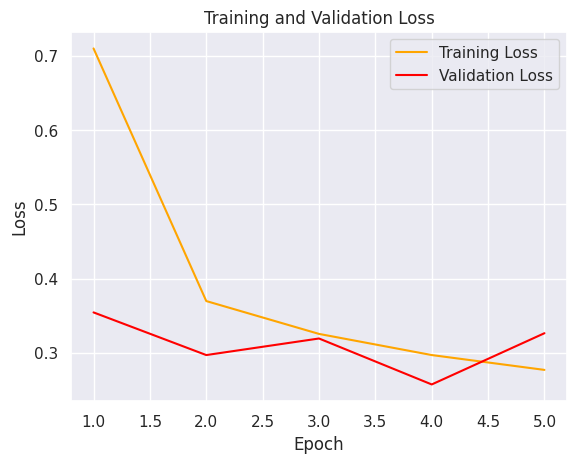

In [ ]:
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='orange', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Extracting values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Calculating average accuracy and loss
avg_acc = np.mean(acc)
avg_val_acc = np.mean(val_acc)
avg_loss = np.mean(loss)
avg_val_loss = np.mean(val_loss)

# Printing the values for each epoch
print("Epoch\tTraining Accuracy\tValidation Accuracy\tTraining Loss\tValidation Loss")
for i in range(len(acc)):
    print(f"{i+1}\t{acc[i]:.4f}\t\t{val_acc[i]:.4f}\t\t{loss[i]:.4f}\t\t{val_loss[i]:.4f}")

# Printing average accuracy and loss
print("\nAverage Training Accuracy: {:.4f}".format(avg_acc))
print("Average Validation Accuracy: {:.4f}".format(avg_val_acc))
print("Average Training Loss: {:.4f}".format(avg_loss))
print("Average Validation Loss: {:.4f}".format(avg_val_loss))

Epoch	Training Accuracy	Validation Accuracy	Training Loss	Validation Loss
1	0.7890		0.8867		0.7098		0.3544
2	0.8814		0.9052		0.3696		0.2969
3	0.8948		0.9015		0.3254		0.3192
4	0.9041		0.9224		0.2969		0.2573
5	0.9116		0.9011		0.2769		0.3263

Average Training Accuracy: 0.8762
Average Validation Accuracy: 0.9034
Average Training Loss: 0.3957
Average Validation Loss: 0.3108


In [ ]:
final_train_acc = history.history['accuracy'][-1] * 100
final_val_acc = history.history['val_accuracy'][-1] * 100

print("Training Accuracy:", final_train_acc, "%")
print("Validation Accuracy:", final_val_acc, "%")

Training Accuracy: 91.15965962409973 %
Validation Accuracy: 90.1060700416565 %


In [ ]:
y_pred = classifier.predict(valid_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = valid_set.classes

# Calculate precision and F1 score
precision = precision_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Convert F1 score to percentage
f1_percent = f1 * 100

print("Weighted Precision: {:.2f}".format(precision))
print("Weighted F1 Score: {:.2f}".format(f1))
print("Weighted F1 Score (%): {:.2f}".format(f1_percent))

138/138 [==============================] - 80s 580ms/step
Weighted Precision: 0.03
Weighted F1 Score: 0.02
Weighted F1 Score (%): 2.48


In [ ]:
# Get the class labels
class_labels = list(valid_set.class_indices.keys())

# Calculate precision and F1 score
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.03      0.03      0.03       504
                                 Apple___Black_rot       0.04      0.04      0.04       497
                          Apple___Cedar_apple_rust       0.03      0.03      0.03       440
                                   Apple___healthy       0.03      0.03      0.03       502
                               Blueberry___healthy       0.03      0.03      0.03       454
          Cherry_(including_sour)___Powdery_mildew       0.01      0.01      0.01       421
                 Cherry_(including_sour)___healthy       0.01      0.02      0.02       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.02      0.02       410
                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       477
               Corn_(maize)___Northern_Leaf_Blight       0.02      0.02      0.